# titanic-survival-study

Have you ever herd of the Titanic? Yea, that famous ship that crashed into an icebrg and was later adapted into a movie. 

In this project I will use the passenger data and Machine Learning to predict if a passenger survived the accident. 

In [22]:
!pip install jovian --upgrade --quiet

In [23]:
import jovian

In [24]:
# Execute this to save new versions of the notebook
jovian.commit(project="titanic-survival-study")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/siddharthkatta123/titanic-survival-study


'https://jovian.ai/siddharthkatta123/titanic-survival-study'

In [25]:
! pip install scikit-learn --upgrade --quiet

In [26]:
! pip install opendatasets --upgrade --quiet

In [27]:
import opendatasets as od

In [28]:
dataset_url = 'https://www.kaggle.com/c/titanic/data?select=test.csv'

In [29]:
od.download(dataset_url)

Skipping, found downloaded files in "./titanic" (use force=True to force download)


In [30]:
import os

In [31]:
data_dir = './titanic'

In [32]:
os.listdir(data_dir)

['train.csv', 'gender_submission.csv', 'test.csv']

In [33]:
train_csv = data_dir + '/train.csv'

In [34]:
!pip install pandas --quiet

In [35]:
import pandas as pd

In [36]:
train_df = pd.read_csv(train_csv)

In [37]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
! pip install matplotlib plotly seaborn --quiet

In [40]:
import plotly.express as px
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams ['font.size'] = 14
matplotlib.rcParams ['figure.figsize'] = (10,6)
matplotlib.rcParams ['figure.facecolor'] = '#00000000'

In [41]:
fig = px.histogram(train_df, x='Age', marginal='box', color_discrete_sequence=['red'])
fig.update_layout(bargap=0.1)
fig.show()

In [42]:
fig = px.histogram(train_df, x='Fare', marginal='box')
fig.update_layout(bargap=0.1)
fig.show()

In [43]:
!pip install jovian --upgrade --quiet

In [44]:
import jovian

In [45]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/siddharthkatta123/titanic-survival-study


'https://jovian.ai/siddharthkatta123/titanic-survival-study'

In [46]:
input_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']

In [47]:
target_cols = 'Survived'

In [48]:
train_input = train_df[input_cols].copy()

In [49]:
train_input

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S
887,1,female,19.0,0,0,30.0000,B42,S
888,3,female,NaN,1,2,23.4500,NaN,S
889,1,male,26.0,0,0,30.0000,C148,C


In [50]:
train_target = train_df[target_cols].copy()

In [51]:
train_target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [52]:
import numpy as np

In [53]:
numerical_cols = train_input.select_dtypes(include=np.number).columns.tolist()
train_input[numerical_cols]

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


In [54]:
categorical_cols = train_input.select_dtypes('object').columns.tolist()
train_input[categorical_cols]

,Sex,Cabin,Embarked
0,male,NaN,S
1,female,C85,C
2,female,NaN,S
3,female,C123,S
4,male,NaN,S
...,...,...,...
886,male,NaN,S
887,female,B42,S
888,female,NaN,S
889,male,C148,C


In [55]:
train_input

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S
887,1,female,19.0,0,0,30.0000,B42,S
888,3,female,NaN,1,2,23.4500,NaN,S
889,1,male,26.0,0,0,30.0000,C148,C


In [56]:
import jovian 

In [57]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/siddharthkatta123/titanic-survival-study


'https://jovian.ai/siddharthkatta123/titanic-survival-study'

# **IMPUTER**

In this section I will use the SimpleImputer to replace the null values in the data with the mean. Most of the null values in this dataset are age. I believe that the average age of all the passengers will be the closest estimation we can get for these null values. 

In [58]:
from sklearn.impute import SimpleImputer

In [59]:
imputer = SimpleImputer(strategy='mean')

In [60]:
train_df[numerical_cols].isna().sum()

Pclass      0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [61]:
imputer.fit(train_df[numerical_cols])

SimpleImputer()

In [62]:
train_input[numerical_cols] = imputer.transform(train_input[numerical_cols])

In [63]:
train_input[numerical_cols].isna().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

# **SCALING**
In this section I will use the MinMaxScaler to scale the data. This makes sure that the outliers in the data wont skew our data or our predictions. 


In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()

In [66]:
scaler.fit(train_df[numerical_cols])

MinMaxScaler()

In [67]:
train_input[numerical_cols] = scaler.transform(train_input[numerical_cols])

In [68]:
train_input[numerical_cols]

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.271174,0.125,0.000000,0.014151
1,0.0,0.472229,0.125,0.000000,0.139136
2,1.0,0.321438,0.000,0.000000,0.015469
3,0.0,0.434531,0.125,0.000000,0.103644
4,1.0,0.434531,0.000,0.000000,0.015713
...,...,...,...,...,...
886,0.5,0.334004,0.000,0.000000,0.025374
887,0.0,0.233476,0.000,0.000000,0.058556
888,1.0,0.367921,0.125,0.333333,0.045771
889,0.0,0.321438,0.000,0.000000,0.058556


# **ONE HOT ENCODING**

This dataset contains a lot of categorical which cannot be used in our machine larning model unless converted into numerical values. 

In this section I will use the OneHotEncoder function to convert the categorical variables into numerical by creating a new column for each categorical varibale and giving it a 1 or 0 value. 

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [49]:
encoder.fit(train_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [50]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))

In [51]:
train_input[encoded_cols] = encoder.transform(train_input[categorical_cols])

In [52]:
train_input[numerical_cols + encoded_cols]

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B101,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B37,Cabin_B38,Cabin_B39,Cabin_B4,Cabin_B41,Cabin_B42,Cabin_B49,Cabin_B5,...,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1.0,0.271174,0.125,0.000000,0.014151,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472229,0.125,0.000000,0.139136,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.321438,0.000,0.000000,0.015469,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.434531,0.125,0.000000,0.103644,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.434531,0.000,0.000000,0.015713,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.5,0.334004,0.000,0.000000,0.025374,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
887,0.0,0.233476,0.000,0.000000,0.058556,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
888,1.0,0.367921,0.125,0.333333,0.045771,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
889,0.0,0.321438,0.000,0.000000,0.058556,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [53]:
from sklearn.model_selection import train_test_split

In [57]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(train_input[numerical_cols + encoded_cols],
                                                                        train_target,
                                                                        test_size=0.2,
                                                                        random_state=42
                                                                        )

In [55]:
import jovian

In [56]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/siddharthkatta123/titanic-survival-study


'https://jovian.ai/siddharthkatta123/titanic-survival-study'

# **Logistic Regression**

First I will fit a regression model to the data and see how well it works. 

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model = LogisticRegression(solver = 'liblinear')

In [60]:
model.fit(train_inputs, train_targets)

LogisticRegression(solver='liblinear')

In [62]:
train_preds = model.predict(train_inputs)

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
def score (targets, preds):
  error = accuracy_score(targets, preds)
  return error

In [77]:
score(train_preds, train_targets)

0.8356741573033708

In [79]:
val_preds = model.predict(val_inputs)

In [80]:
score(val_preds, val_targets)

0.8044692737430168

In [81]:
weight_df = pd.DataFrame({
    'feature': (numerical_cols + encoded_cols),
    'weight': model.coef_.tolist()[0]
})

weight_df

,feature,weight
0,Pclass,-1.298923
1,Age,-1.450532
2,SibSp,-1.330955
3,Parch,-0.512537
4,Fare,0.508641
...,...,...
154,Cabin_nan,-0.622297
155,Embarked_C,0.544477
156,Embarked_Q,0.278938
157,Embarked_S,0.040188


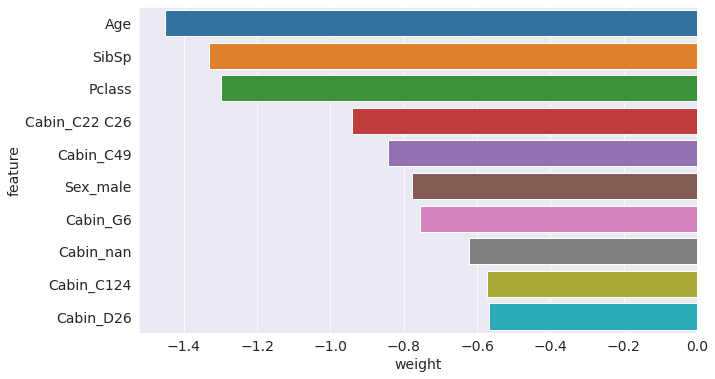

In [82]:
sns.barplot(data=weight_df.sort_values('weight', ascending = 'false').head(10), x='weight', y='feature')

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/siddharthkatta123/titanic-survival-study


'https://jovian.ai/siddharthkatta123/titanic-survival-study'

# **Test Data**

In [110]:
test_csv = data_dir + '/test.csv'

In [111]:
test_df = pd.read_csv(test_csv)

In [112]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [113]:
test_df[numerical_cols] = imputer.transform(test_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])
test_df[encoded_cols] = encoder.transform(test_df[categorical_cols])

In [114]:
test_inputs = test_df[numerical_cols + encoded_cols]

In [115]:
test_preds = model.predict(test_inputs)

In [116]:
submission_csv = data_dir + '/gender_submission.csv'

In [119]:
submission_df = pd.read_csv(submission_csv)

In [ ]:
submission_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission_df['Survived'] = test_preds

In [ ]:
submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission_df.to_csv('submission.csv', index=False)

In [ ]:
from IPython.display import FileLink
FileLink('submission.csv') # Doesn't work on Colab, use the file browser instead to download the file.

/home/jovyan/submission.csv

# Decision Trees and Random Forests

In this section I will fit the data to Decision trees and Random Forests. 

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
tree = DecisionTreeClassifier(random_state=42)

In [87]:
tree.fit(train_inputs, train_targets)

DecisionTreeClassifier(random_state=42)

In [90]:
tree_preds = tree.predict(train_inputs)

In [93]:
score(train_targets, tree_preds)

0.9845505617977528

In [94]:
val_preds = tree.predict(val_inputs)

In [97]:
score(val_targets, val_preds)

0.7821229050279329

In [124]:
test_preds = tree.predict(test_inputs)

In [125]:
submission_df['Survived'] = test_preds

In [126]:
submission_df.to_csv('submission.csv', index=False)

In [127]:
from IPython.display import FileLink
FileLink('submission.csv') # Doesn't work on Colab, use the file browser instead to download the file.

/content/submission.csv

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
forest = RandomForestClassifier(n_jobs=-1, random_state=42)

In [140]:
forest.fit(train_inputs, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [141]:
forest_preds = forest.predict(train_inputs)

In [142]:
accuracy_score(forest_preds, train_targets)

0.9845505617977528

In [143]:
val_preds = forest.predict(val_inputs)

In [144]:
accuracy_score(val_preds, val_targets)

0.8100558659217877

In [145]:
test_preds = forest.predict(test_inputs)

In [146]:
submission_df['Survived'] = test_preds

In [147]:
submission_df.to_csv('submission.csv', index=False)

In [148]:
FileLink('submission.csv')

/content/submission.csv

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/siddharthkatta123/titanic-survival-study


'https://jovian.ai/siddharthkatta123/titanic-survival-study'

# XGBClassifier

Finally I will fit an XGBClassifier to the data. 

In [98]:
from xgboost import XGBClassifier

In [220]:
boost = XGBClassifier(random_state=42, n_jobs=-1, n_estimators=240)

In [221]:
boost.fit(train_inputs, train_targets)

XGBClassifier(n_estimators=240, n_jobs=-1, random_state=42)

In [222]:
boost_preds = boost.predict(train_inputs)

In [223]:
score(boost_preds, train_targets)

0.9129213483146067

In [224]:
val_preds = boost.predict(val_inputs)

In [225]:
score(val_preds, val_targets)

0.8212290502793296

In [151]:
def test_params(**params):
    model = XGBClassifier(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_rmse = accuracy_score(model.predict(train_inputs), train_targets)
    val_rmse = accuracy_score(model.predict(val_inputs), val_targets)
    return train_rmse, val_rmse

In [197]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy Score')
    plt.legend(['Training', 'Validation'])

In [155]:
?XGBClassifier

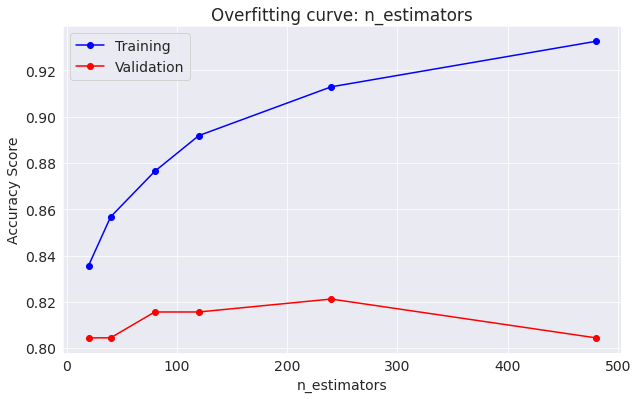

In [199]:
test_param_and_plot('n_estimators', [20,40,80,120,240, 480] )

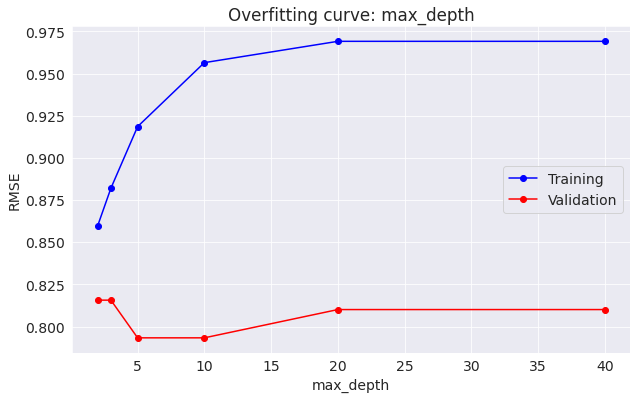

In [184]:
test_param_and_plot('max_depth', [2, 3, 5, 10, 20, 40])

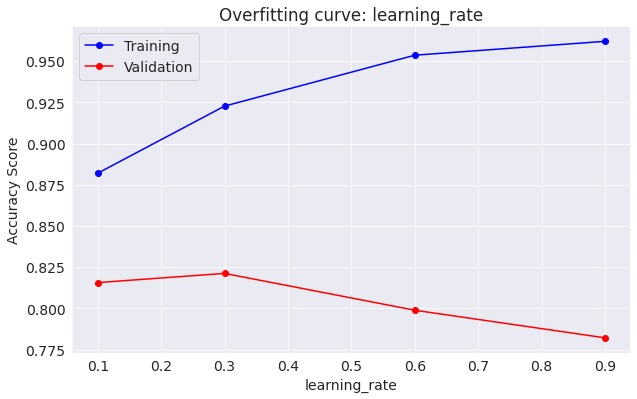

In [213]:
test_param_and_plot('learning_rate', [0.1, 0.3, 0.6, 0.9])


In [117]:
test_preds = boost.predict(test_inputs)

In [120]:
submission_df['Survived'] = test_preds

In [121]:
submission_df.to_csv('submission.csv', index=False)

In [123]:
from IPython.display import FileLink
FileLink('submission.csv')

/content/submission.csv

In [227]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/siddharthkatta123/titanic-survival-study


'https://jovian.ai/siddharthkatta123/titanic-survival-study'

# Results and conclusion.

XGBClassifier was the best fit to the data. 